In [1]:
import os
os.chdir("D:\\Course code")


In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv("IMDb movies.csv")

C:\Users\DELL1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('display.max_columns', None)

In [7]:
df.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [15]:
df.shape


(85855, 22)

In [21]:
feature = ['duration']
data = df[feature].copy()
data.fillna(-999, inplace=True)
data = data.values
print(data)

[[ 45]
 [ 70]
 [ 53]
 ...
 [130]
 [ 98]
 [ 74]]


In [25]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

data = se.fit_transform(data.reshape(-1,1))
print(data)

[[-2.45420385]
 [-1.34573909]
 [-2.09949512]
 ...
 [ 1.31457632]
 [-0.10425856]
 [-1.16838473]]


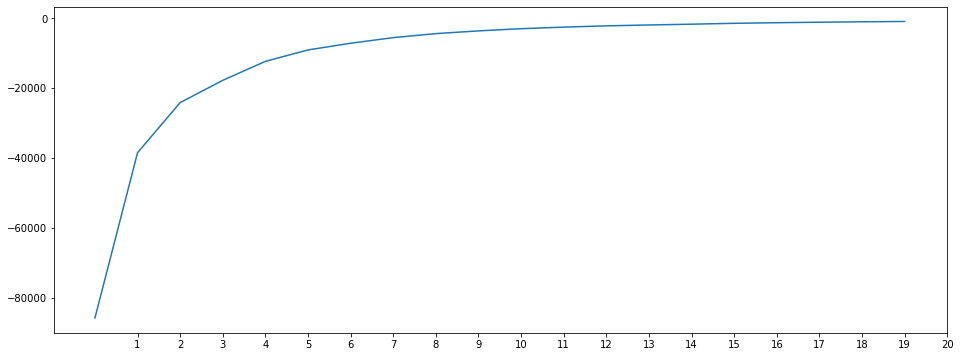

Wall time: 56.4 s


In [28]:
%%time
from sklearn.cluster import KMeans


kmeans = [KMeans(n_clusters=i).fit(data)  for i in range(1,21)]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

plt.figure(figsize=(16,6))
plt.plot(scores)
plt.xticks(range(1,21))
plt.show()

In [29]:
Sum_sq_dist = []

kmeans = [KMeans(n_clusters=i).fit(data) for i in range(1,21)]
Sum_sq_dist.append([kmeans[i].inertia_  for i in range(len(kmeans))])
print(Sum_sq_dist)

[[85855.00000001698, 38562.23119791802, 24236.72037781253, 17948.493554859015, 12404.014622785282, 9133.040900149148, 7214.512557704766, 5607.430387791993, 4458.962110646818, 3696.258691830386, 3026.9843355655466, 2641.484828667283, 2283.1651336568207, 1997.1786722694185, 1744.927731198603, 1506.5167271496352, 1354.2917585169246, 1214.8298409826011, 1081.2283987741655, 997.2993910230089]]


([<matplotlib.axis.XTick at 0x28a29c8dc08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

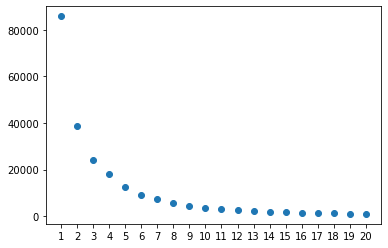

In [31]:
plt.scatter(range(1,21), Sum_sq_dist)
plt.xticks(range(1,21))

In [35]:
kmeans_mod = KMeans(n_clusters=8, n_init=15, random_state=123)
kmeans_fitted = kmeans_mod.fit(data)



In [43]:
kmeans_fitted.cluster_centers_

array([[-0.07057058],
       [ 2.76047259],
       [-0.60519943],
       [ 1.51911655],
       [ 6.57111374],
       [ 0.60051887],
       [-1.40910579],
       [18.24083314]])

In [46]:
centroid_df = pd.DataFrame(kmeans_mod.cluster_centers_, columns = ['duration_centroids_8'])
centroid_df

,duration_centroids_8
0,-0.070571
1,2.760473
2,-0.605199
3,1.519117
4,6.571114
5,0.600519
6,-1.409106
7,18.240833


In [49]:
predictions = kmeans_fitted.fit_predict(data)
pred_df = pd.DataFrame(predictions , columns=['labels'])


labels
0         28092
2         27580
5         14066
6          6613
3          6209
1          3077
4           202
7            16
dtype: int64

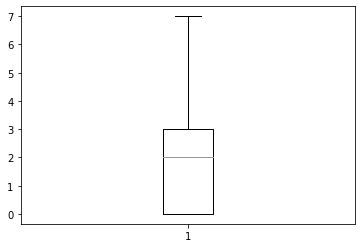

In [53]:
plt.boxplot(predictions)
plt.show()